In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

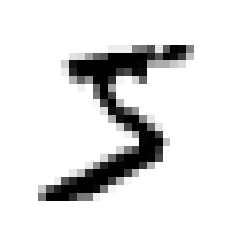

In [5]:
import matplotlib as m
import matplotlib.pyplot as p

data = X[0]
data_image = data.reshape(28,28)
p.imshow(data_image, cmap = m.cm.binary, interpolation ='nearest')
p.axis('off')
p.show()

In [6]:
y[24000]

'8'

In [7]:
X_train, X_test, y_train, y_test =X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
import numpy as np
si = np.random.permutation(60000)
X_train, y_train = X_train[si], y_train[si]

In [9]:
y_train_6 = (y_train == '6')
y_test_6 = (y_test == '6')

In [10]:
print(y_test_6)

[False False False ... False False  True]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=3)
n.fit(X_train, y_train_6)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
prediction = n.predict(X_test)

In [13]:
print(prediction[40])

False


In [15]:
print(prediction)

[False False False ... False False  True]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction))
print("Classification report:\n", classification_report(y_test_6,prediction))

Confusion Matrix:
 [[9026   16]
 [  14  944]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9042
        True       0.98      0.99      0.98       958

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



In [20]:
from sklearn.metrics import accuracy_score
accuracies = []
score = accuracy_score(y_test_6,prediction)
print("k=%d, accuracy=%.2f%%" %(3, score * 100))
accuracies.append(score)

k=3, accuracy=99.70%


In [25]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train_6)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction1 = logisticReg.predict(X_test)

In [27]:
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction1))
print("Classification report:\n",classification_report(y_test_6, prediction1))

Confusion Matrix:
 [[8972   70]
 [  84  874]]
Classification report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      9042
        True       0.93      0.91      0.92       958

    accuracy                           0.98     10000
   macro avg       0.96      0.95      0.96     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
score1 = accuracy_score(y_test_6,prediction1)
print("accuracy=%.2f%%" % (score1 * 100))

accuracy=98.46%


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
prediction2 = lda.fit(X_train,y_train_6).predict(X_test)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [30]:
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction2))
print("Classification report:\n",classification_report(y_test_6, prediction2))

Confusion Matrix:
 [[8939  103]
 [ 135  823]]
Classification report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      9042
        True       0.89      0.86      0.87       958

    accuracy                           0.98     10000
   macro avg       0.94      0.92      0.93     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
score2 = accuracy_score(y_test_6,prediction2)
print("accuracy=%.2f%%" % (score2 * 100))

accuracy=97.62%


In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
prediction3 = qda.fit(X_train,y_train_6).predict(X_test)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [34]:
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction3))
print("Classification report:\n",classification_report(y_test_6, prediction3))

Confusion Matrix:
 [[5764 3278]
 [   5  953]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      0.64      0.78      9042
        True       0.23      0.99      0.37       958

    accuracy                           0.67     10000
   macro avg       0.61      0.82      0.57     10000
weighted avg       0.92      0.67      0.74     10000



In [35]:
score3 = accuracy_score(y_test_6,prediction3)
print("accuracy=%.2f%%" % (score3 * 100))

accuracy=67.17%


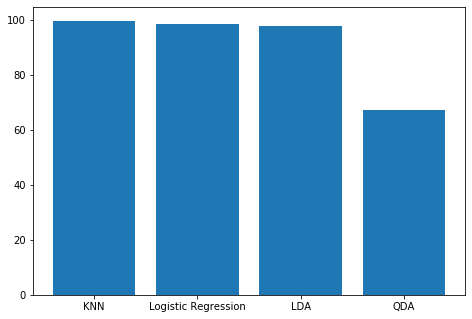

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Accuracy = ['KNN', 'Logistic Regression', 'LDA', 'QDA']
Scores = [score*100,score1*100,score2*100,score3*100]
ax.bar(Accuracy,Scores)
plt.show()


In [37]:
print("Accuracies:\nKNN\tLogReg\t\t\tLDA\t\t\tQDA","\n",score*100,"\t",score1*100,"\t",(score2*100),"\t",score3*100)

Accuracies:
KNN	LogReg			LDA			QDA 
 99.7 	 98.46000000000001 	 97.61999999999999 	 67.17


In [38]:
print("1.KNN:\n")
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction))
print("Classification report:\n",classification_report(y_test_6, prediction),"\n")

print("2.Logistic Regression:\n")
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction1))
print("Classification report:\n",classification_report(y_test_6, prediction1),"\n")

print("3.LDA:\n")
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction2))
print("Classification report:\n",classification_report(y_test_6, prediction2),"\n")

print("4.QDA:\n")
print("Confusion Matrix:\n",confusion_matrix(y_test_6, prediction3))
print("Classification report:\n",classification_report(y_test_6, prediction3),"\n")

1.KNN:

Confusion Matrix:
 [[9026   16]
 [  14  944]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9042
        True       0.98      0.99      0.98       958

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000
 

2.Logistic Regression:

Confusion Matrix:
 [[8972   70]
 [  84  874]]
Classification report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      9042
        True       0.93      0.91      0.92       958

    accuracy                           0.98     10000
   macro avg       0.96      0.95      0.96     10000
weighted avg       0.98      0.98      0.98     10000
 

3.LDA:

Confusion Matrix:
 [[8939  103]
 [ 135  823]]
Classification report:
               precision    recall  f1-score   support

       False       0.99      0.99    

In [39]:
n1 = KNeighborsClassifier(n_neighbors=3)
n1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
y_pred = n1.predict(X_test)

In [41]:
print(y_pred)

['7' '2' '1' ... '4' '5' '6']


In [42]:
cnf = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

In [43]:
print("Confusion Matrix:\n",cnf)
print("Classification Report\n",clr)

Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98     

In [44]:
acc = accuracy_score(y_test,y_pred)
print("k=%d, accuracy=%.2f%%" % (3, acc * 100))

k=3, accuracy=97.05%


In [46]:
logisticReg1 = LogisticRegression(random_state=0, multi_class='ovr')
logisticReg1.fit(X_train,y_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred1 = logisticReg1.predict(X_test)

In [48]:
confm1 = confusion_matrix(y_test, y_pred1)
classifr1 = classification_report(y_test, y_pred1)

In [49]:
print("Confusion Matrix:\n",confm1)
print("Classification Report\n",classifr1)

Confusion Matrix:
 [[ 960    0    2    1    0    3    7    3    3    1]
 [   0 1109    4    3    0    1    5    1   12    0]
 [  10    9  902   20    7    3   12   15   51    3]
 [   4    0   18  919    2   23    5   10   22    7]
 [   1    2    4    5  910    0    9    3   10   38]
 [   9    1    0   38   10  769   16    7   35    7]
 [   8    4    7    0    5   19  907    0    8    0]
 [   4    7   24    6    8    2    1  940    5   31]
 [  13   14    6   22   12   20   11   12  854   10]
 [   9    8    2   15   30    9    0   27   11  898]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.87      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94     

In [50]:
acc1 = accuracy_score(y_test,y_pred1)
print("accuracy=%.2f%%" % (acc1 * 100))

accuracy=91.68%


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis(solver='svd')
y_pred2 = lda1.fit(X_train,y_train).predict(X_test)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [54]:
confm2 = confusion_matrix(y_test, y_pred2)
classifr2 = classification_report(y_test, y_pred2)

In [55]:
print("Confusion Matrix:\n",confm2)
print("Classification Report\n",classifr2)

Confusion Matrix:
 [[ 940    0    1    4    2   13    9    1    9    1]
 [   0 1096    4    3    2    2    3    0   25    0]
 [  15   32  816   34   21    5   37    9   57    6]
 [   5    5   25  883    4   25    3   16   29   15]
 [   0   12    6    0  888    4    7    2   10   53]
 [   8    8    4   44   12  735   15   10   38   18]
 [  12    8   11    0   25   29  857    0   16    0]
 [   2   30   15    9   22    2    0  864    4   80]
 [   7   27    8   27   20   53   10    6  790   26]
 [   9    7    1   13   63    6    0   37   12  861]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.89      0.97      0.93      1135
           2       0.92      0.79      0.85      1032
           3       0.87      0.87      0.87      1010
           4       0.84      0.90      0.87       982
           5       0.84      0.82      0.83       892
           6       0.91      0.89      0.90     

In [56]:
acc2 = accuracy_score(y_test,y_pred2)
print("accuracy=%.2f%%" % (acc2 * 100))

accuracy=87.30%


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda1 = QuadraticDiscriminantAnalysis()
y_pred3 = qda1.fit(X_train,y_train).predict(X_test)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [58]:
confm3 = confusion_matrix(y_test, y_pred3)
classifr3 = classification_report(y_test, y_pred3)

In [59]:
print("Confusion Matrix:\n",confm3)
print("Classification Report\n",classifr3)

Confusion Matrix:
 [[ 948    1    1    6    0    1   10    1   11    1]
 [  23 1075    2    1    1    0   14    0   12    7]
 [ 525    8  189   67    3    0  156    4   65   15]
 [ 556   11    1  242    0    1   39    2   81   77]
 [ 301    6    6    6   90    1   58    8  119  387]
 [ 376    4    1   13    0   28   72    2  337   59]
 [  22    4    1    1    0    2  921    0    6    1]
 [  24    7    2   14    3    0    3  274   22  679]
 [ 159   48    3    8    1    5   37    3  606  104]
 [  21    7    3    5    1    0    0    8    4  960]]
Classification Report
               precision    recall  f1-score   support

           0       0.32      0.97      0.48       980
           1       0.92      0.95      0.93      1135
           2       0.90      0.18      0.30      1032
           3       0.67      0.24      0.35      1010
           4       0.91      0.09      0.17       982
           5       0.74      0.03      0.06       892
           6       0.70      0.96      0.81     

In [60]:
acc3 = accuracy_score(y_test,y_pred3)
print("accuracy=%.2f%%" % (acc3 * 100))

accuracy=53.33%


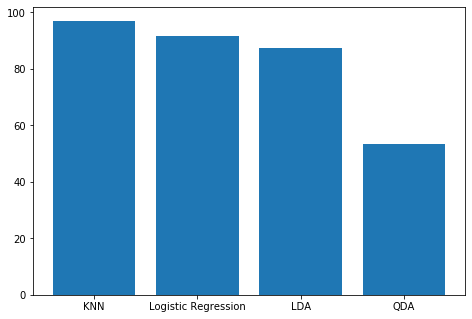

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure()
af = fig.add_axes([0,0,1,1])
Accuracy = ['KNN', 'Logistic Regression', 'LDA', 'QDA']
Scores = [acc*100,acc1*100,acc2*100,acc3*100]
af.bar(Accuracy,Scores)
plt.show()


In [62]:
print("Accuracies:\nKNN\tLogReg\tLDA\tQDA","\n",acc*100,"\t",acc1*100,"\t",(acc2*100),"\t",acc3*100)

Accuracies:
KNN	LogReg	LDA	QDA 
 97.05 	 91.67999999999999 	 87.3 	 53.33


In [ ]:
print("1.KNN:\n")
print("Confusion Matrix:\n",cnf)
print("Classification report:\n",clr,"\n")

print("2.Logistic Regression:\n")
print("Confusion Matrix:\n",conf1)
print("Classification report:\n",clr1,"\n")

print("3.LDA:\n")
print("Confusion Matrix:\n",cnf2)
print("Classification report:\n",clr2,"\n")

print("4.QDA:\n")
print("Confusion Matrix:\n",cnf3)
print("Classification report:\n",clr3,"\n")